<a href="https://colab.research.google.com/github/TioHalu/Forest_Fire_Prediction_Colab/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [52]:
df=pd.read_csv('/content/drive/MyDrive/tugas/dataset/Kab. Muaro Jambi.csv')

In [53]:
# df = df[:-18]
import math
data  = df.rename(columns={'Tanggal':'Date','Tavg':'Temperature','RH_avg':'Humidity','ff_avg':'Wind','RR':'Rainfall'})
data = data[0:100]
data = data.replace('',math.nan)
data = data.replace(8888,math.nan)
data = data.fillna(data.mean())
data = data['Temperature']

<ipython-input-53-350fd035f3a0>:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.mean())


In [49]:
#data preprocessing
# col = ['Formatted Date','Summary','Precip Type','Apparent Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Loud Cover','Pressure (millibars)','Daily Summary']
# data = df.drop(col, axis="columns", inplace=True)
# data= df.drop(df.index[100:])
# dataReal = df.drop(df.index[125:])

In [9]:

# Menormalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data.values.reshape(-1,1))

# Splitting the data into training and testing sets
train_size = int(len(data_scaled))
train_data = data_scaled[:train_size, :]
test_data = data_scaled[train_size:, :]

# Creating the training and testing sets
def create_dataset(dataset, time_steps=1):
    X, Y = [], []
    for i in range(len(dataset)-time_steps-1):
        a = dataset[i:(i+time_steps), :]
        X.append(a)
        Y.append(dataset[i + time_steps, :])
    return np.array(X), np.array(Y)

time_steps = 10
X_train, y_train = create_dataset(train_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

# Building the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_steps, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the model
model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=2)

# Making predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverting the scaling
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform(y_train)
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform(y_test)

# Calculating the evaluation metrics
mape = np.mean(np.abs((y_test - test_predict) / y_test)) * 100
mae = mean_absolute_error(y_test, test_predict)
r2 = r2_score(y_test, test_predict)
mse = mean_squared_error(y_test, test_predict)

print("MAPE: ", mape)
print("MAE: ", mae)
print("R-squared: ", r2)
print("MSE: ", mse)

Epoch 1/50
2/2 - 4s - loss: 0.4065 - 4s/epoch - 2s/step
Epoch 2/50
2/2 - 0s - loss: 0.2962 - 28ms/epoch - 14ms/step
Epoch 3/50
2/2 - 0s - loss: 0.2074 - 31ms/epoch - 15ms/step
Epoch 4/50
2/2 - 0s - loss: 0.1312 - 36ms/epoch - 18ms/step
Epoch 5/50
2/2 - 0s - loss: 0.0742 - 31ms/epoch - 15ms/step
Epoch 6/50
2/2 - 0s - loss: 0.0447 - 30ms/epoch - 15ms/step
Epoch 7/50
2/2 - 0s - loss: 0.0544 - 30ms/epoch - 15ms/step
Epoch 8/50
2/2 - 0s - loss: 0.0706 - 36ms/epoch - 18ms/step
Epoch 9/50
2/2 - 0s - loss: 0.0631 - 35ms/epoch - 17ms/step
Epoch 10/50
2/2 - 0s - loss: 0.0481 - 36ms/epoch - 18ms/step
Epoch 11/50
2/2 - 0s - loss: 0.0418 - 36ms/epoch - 18ms/step
Epoch 12/50
2/2 - 0s - loss: 0.0430 - 31ms/epoch - 16ms/step
Epoch 13/50
2/2 - 0s - loss: 0.0466 - 29ms/epoch - 15ms/step
Epoch 14/50
2/2 - 0s - loss: 0.0485 - 29ms/epoch - 15ms/step
Epoch 15/50
2/2 - 0s - loss: 0.0479 - 28ms/epoch - 14ms/step
Epoch 16/50
2/2 - 0s - loss: 0.0451 - 30ms/epoch - 15ms/step
Epoch 17/50
2/2 - 0s - loss: 0.0423 -

ValueError: ignored

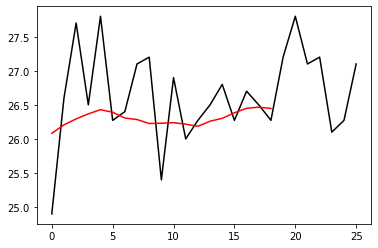

In [56]:
import matplotlib.pyplot as plt
plt.plot(Y_test, color="black")
plt.plot(test_predict, color='red')
# plt.plot(Y_train, color="yellow")
# plt.plot(Y_train, color='blue')

In [54]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Pisahkan atribut dan label
# data = pd.DataFrame(data)
X = data.drop(['Temperature'], axis=1)
y = data['Temperature']

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# y_train

# Buat objek SVR dan latih model dengan data latih
regressor = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
regressor.fit(X, y_train)

# Prediksi nilai temperatur dengan data uji
y_pred = regressor.predict(X_test)

# # Evaluasi model dengan menggunakan mean squared error dan r-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# # Cetak hasil evaluasi
print('Mean squared error: ', mse)
print('R-squared score: ', r2)


ValueError: ignored